#### Fraud: A how-to guide
In this problem, you will use density modeling to try and ensure that there are no statistical irregularities in data that you have generated yourself.

1. Download the following data containing personal transactions over a period of several years: https://course-resources.minerva.kgi.edu/uploaded_files/mke/Y5GZpr/anonymized.csv
2. Now build a density model for the number of transactions that occur in a single month.
3. Create plots showing the distribution that you’ve created.
4. Draw 10 samples from this density model using scikit.learn.

In [3]:
import pandas as pd

trans = pd.read_csv('10.1 fraud detection.csv')

In [4]:
trans.head()

,Date,Amount
0,25May2016,54241.35
1,29May2017,54008.83
2,30Jun2017,54008.82
3,05Jan2017,52704.37
4,23Feb2017,52704.36


In [75]:
import numpy as np

# let's pick month of May 2016
may16 = trans.iloc[np.where(trans['Date'].str.contains('May2016'))]

In [76]:
may16.head()

,Date,Amount
0,25May2016,54241.35
32,23May2016,43198.67
60,13May2016,18400.00
227,05May2016,100.00
241,10May2016,38.00


In [77]:
trans_may16 = np.array(may16['Amount'])
trans_may16

array([ 5.424135e+04,  4.319867e+04,  1.840000e+04,  1.000000e+02,
        3.800000e+01,  3.800000e+01,  1.102000e+01, -2.040000e+01,
       -2.697000e+01, -3.200000e+01, -3.798000e+01, -3.798000e+01,
       -3.798000e+01, -4.320000e+01, -6.600000e+01, -1.300000e+02,
       -1.913900e+02, -3.289800e+02, -3.420000e+02, -3.490000e+02,
       -3.523200e+02, -5.168800e+02, -6.000000e+02, -6.250000e+02,
       -6.810000e+02, -6.842500e+02, -7.000000e+02, -1.500000e+03,
       -1.565700e+03, -1.776000e+03, -2.250000e+03, -3.470000e+03,
       -5.000000e+03, -5.300000e+03, -7.804170e+03, -1.000000e+04,
       -1.400000e+04, -1.800000e+04])

In [108]:
from sklearn.mixture import GaussianMixture

key_freq = trans_may16.reshape(-1, 1)
gm = GaussianMixture(n_components=2).fit(key_freq)

In [109]:
probs = gm.score_samples(key_freq)

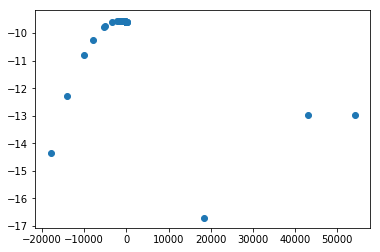

In [110]:
from matplotlib import pyplot as plt

plt.scatter(trans_may16, probs)
plt.show()

#### Clustering survey data
In this problem, you will use expectation maximization (EM) on survey data. For the statistical model that we wish to fit, we will assume that everyone comes from one of four clusters.

1. Download the following python script which generates (synthetic) responses to a binary questionnaire: https://course-resources.minerva.kgi.edu/uploaded_files/mke/VNN0ZV/questionnaire.py
2. Use the script to generate an example dataset.
3. Download the following python script which (will) infer which person belonged to which cluster: https://course-resources.minerva.kgi.edu/uploaded_files/mke/Y60gqr/questionnaire-cluster.py In particular you will need to:
4. Estimate the probability of a person belonging to a particular cluster.
5. Estimate the maximum likelihood parameters for the biases. This is the probability that a person from a particular cluster will answer true to a particular question.

In [99]:
import numpy as np

p_cluster = [0.4, 0.3, 0.15, 0.15]

n_questions = 20
n_people = 1000
n_clusters = len(p_cluster)

biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))
people = np.random.choice(range(n_clusters), size=n_people, p=p_cluster)

answers = np.zeros((n_people, n_questions), dtype=bool)

for a in range(n_people):
    cluster = people[a]
    answers[a, :] = np.random.rand(n_questions) < biases[:, cluster]

print(people)

np.savetxt("10.1 questionnaire.csv", answers, delimiter=",", fmt="%d")
np.savetxt("10.1 questionnaire_answers.csv", people, delimiter=",", fmt="%d")
np.savetxt("10.1 questionnaire_biases.csv", biases, delimiter=",", fmt="%.3f")

[0 0 0 3 3 1 1 0 1 1 1 0 2 0 3 1 2 2 0 2 0 0 1 1 1 0 1 0 1 0 2 3 0 1 0 1 0
 0 2 3 1 1 0 3 3 1 2 0 1 0 2 1 0 1 0 3 3 1 1 0 1 1 3 1 3 3 2 1 2 0 0 0 3 1
 3 0 1 1 0 1 2 1 0 2 1 0 3 0 0 2 0 2 0 0 0 1 0 0 1 0 2 1 0 1 0 1 3 1 0 0 0
 0 3 0 0 0 0 0 2 3 0 0 0 2 2 0 3 2 0 1 1 0 0 2 1 0 0 1 3 1 1 3 2 3 3 1 1 1
 1 2 1 1 2 0 3 0 1 1 1 1 1 1 0 0 2 3 2 0 0 3 1 1 1 0 3 0 2 1 2 1 1 3 0 1 0
 1 1 0 1 0 0 2 0 3 0 1 3 0 0 3 2 2 1 0 0 2 2 0 3 0 0 2 2 2 1 1 0 2 2 1 2 1
 0 0 0 3 0 0 1 2 1 0 0 0 0 1 0 3 0 1 0 1 1 1 0 0 2 1 1 1 0 2 1 0 1 3 0 0 0
 3 0 0 1 1 0 0 2 0 2 0 1 3 1 0 0 3 3 3 1 0 0 2 0 0 1 1 0 0 1 0 2 0 1 1 0 1
 0 2 3 0 0 3 0 2 1 1 2 2 1 0 1 0 2 1 1 0 3 2 2 0 2 1 0 0 1 0 1 3 1 2 2 2 0
 0 3 0 3 0 1 2 1 0 3 2 0 1 0 3 0 2 1 1 3 1 3 1 1 0 1 0 2 0 2 1 1 1 1 0 1 1
 1 1 2 0 0 3 3 1 0 0 1 1 1 1 2 2 3 0 0 1 0 2 2 2 0 3 0 3 2 0 0 2 2 1 3 3 2
 0 0 1 2 1 0 0 0 2 0 0 2 0 0 3 3 0 0 2 2 0 3 0 1 3 0 3 3 1 0 2 0 1 2 1 0 0
 0 2 3 1 2 1 1 1 2 1 2 0 0 0 0 2 1 1 0 0 1 0 2 0 0 0 1 0 0 3 0 2 0 0 0 1 0
 0 2 2 0 3 0 0 1 1 0 0 0 

In [116]:
answers = np.loadtxt("10.1 questionnaire.csv", delimiter=",")
n_people, n_questions = answers.shape
n_clusters = 4

p_clusters = np.asarray([0.25, 0.25, 0.25, 0.25])
biases = np.random.beta(0.75, 0.75, size=(n_questions, n_clusters))

def expectation(answers, biases, p_clusters):
    # In this function we create our expectations.
    
    people = np.dot(p_clusters, np.exp(-1/2 * (answers - biases)**2))

    # normalize the distributions
    people = people / people.sum(axis=1, keepdims=1)
    return people


def maximization(answers, people):
    # Treating all the data as visible, now infer the parameters for the model.

    # This is probably not the correct answer!
    biases = np.zeros((n_questions, n_clusters)) + 0.5
    return biases


for step in range(10):
    people = expectation(answers, biases, p_clusters)
    biases = maximization(answers, people)

print(biases)
print(people)

ValueError: operands could not be broadcast together with shapes (1000,20) (20,4) 